In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'AppleGothic'

import pandas as pd

# 데이터 로드
data_path = '통합데이터_다문화수용성평균.csv'
data = pd.read_csv(data_path)

# 데이터의 기본 정보 및 첫 5행 확인
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   행정구              25 non-null     object 
 1   2022_다문화초등학생수_계  25 non-null     int64  
 2   2022_다문화가구원_소계   25 non-null     int64  
 3   2021_다문화인구_소계    25 non-null     int64  
 4   2022_인구          25 non-null     int64  
 5   2023_초등학교수       25 non-null     int64  
 6   2022 년_종류별 주택수   25 non-null     int64  
 7   등록외국인            25 non-null     int64  
 8   어린이집개수           25 non-null     int64  
 9   도서관개수            25 non-null     int64  
 10  다문화언어강사인원        25 non-null     int64  
 11  어린이복지센터개수        25 non-null     int64  
 12  2020_수준지수        25 non-null     float64
 13  2022_중점학교        25 non-null     int64  
 14  2022_특수학급        25 non-null     int64  
 15  2022_다문화출생신고수    25 non-null     int64  
 16  다문화수용성점수         25 non-null     float64
 17  강사수              2

(None,
    행정구  2022_다문화초등학생수_계  2022_다문화가구원_소계  2021_다문화인구_소계  2022_인구  2023_초등학교수  \
 0  종로구              163            3067          12009   152211          12   
 1   중구              269            3372          12639   130785          12   
 2  용산구              408            6020          18279   233284          15   
 3  성동구              439            5730          12447   288234          21   
 4  광진구              505            6623          21653   351252          21   
 
    2022 년_종류별 주택수  등록외국인  어린이집개수  도서관개수  다문화언어강사인원  어린이복지센터개수  2020_수준지수  \
 0           46810  11152      71      9          6         11     482.96   
 1           42401  10427      64      8          5          3     957.61   
 2           77116  14726     106      4          3          5     124.60   
 3           90740   7000     153      7          3         10      83.99   
 4           93555  14124     152      6          5         13      39.01   
 
    2022_중점학교  2022_특수학급  2022_다문화출생신고수  다문화수용성

## 상관관계

In [92]:
# "Unnamed: 0"과 "행정구" 컬럼 제외하고 상관계수 계산
correlation_matrix = data.iloc[:, 2:].corr()

# 상관계수 매트릭스의 상위 10개 항목 확인
correlation_matrix_abs_top = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
correlation_matrix_top = correlation_matrix_abs_top[1:11]  # 첫 번째는 항상 1이므로 제외

correlation_matrix_top


2022_인구         2022 년_종류별 주택수    0.966882
2022 년_종류별 주택수  2023_초등학교수        0.949767
2022_중점학교       2022_특수학급         0.941385
어린이집개수          2023_초등학교수        0.922844
2022 년_종류별 주택수  어린이집개수            0.911620
2022_인구         2023_초등학교수        0.900518
                어린이집개수            0.894194
2021_다문화인구_소계   등록외국인             0.891935
2022_특수학급       2021_다문화인구_소계     0.851304
2021_다문화인구_소계   2022_다문화가구원_소계    0.835605
dtype: float64

/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


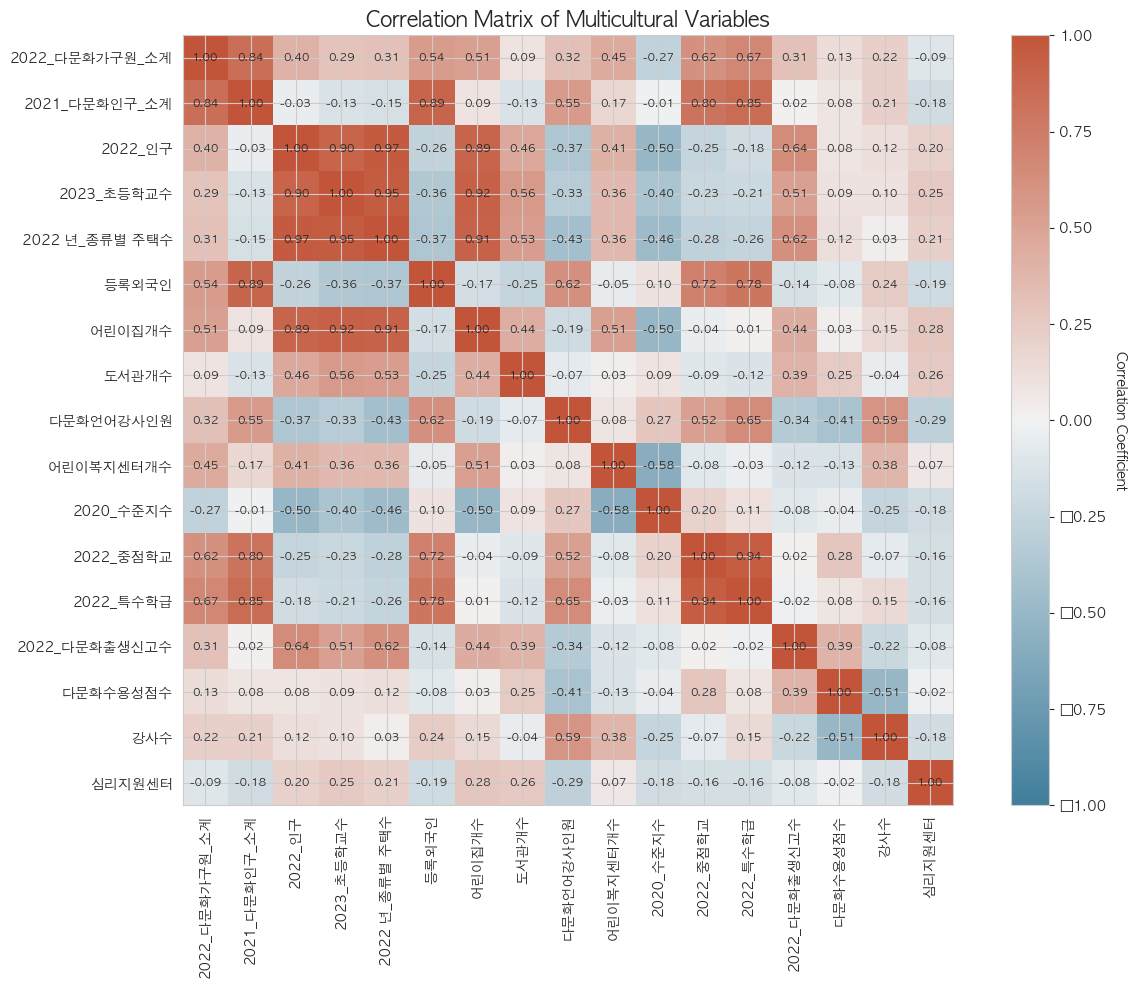

In [93]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap using matplotlib
plt.imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1)

# Create colorbar
cbar = plt.colorbar()
cbar.set_label('Correlation Coefficient', rotation=270, labelpad=15)

# Set labels on x and y axis
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=10, rotation=90)
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=10)

# Add the correlation values in each cell
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)

# Set title
plt.title('Correlation Matrix of Multicultural Variables', fontsize=15)

# Show the plot
plt.show()


주성분 분석(PCA, Principal Component Analysis)는 데이터의 분산을 최대한 보존하면서 원본 데이터의 차원을 줄이는 기법이다. 상관관계가 있는 여러 변수를 적은 수의 주성분으로 요약할 수 있어, 데이터 분석 시 변수의 다중공선성 문제를 완화시키고, 차원의 저주 문제를 해결하는 데에도 유용하다.

## Min-max

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 숫자형 데이터만 선택 (첫 2열 제외)
numeric_data = data.iloc[:, 2:].select_dtypes(include=['float64', 'int64'])

# MinMax 스케일링
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(numeric_data)

# PCA 객체 생성
pca_minmax = PCA()

# PCA 실행 및 결과 확인
pca_minmax_result = pca_minmax.fit_transform(minmax_scaled_data)
explained_variance_ratio_minmax = pca_minmax.explained_variance_ratio_

# 설명력 확인을 위한 데이터프레임 생성
explained_variance_minmax_df = pd.DataFrame({
    'Component': range(1, len(explained_variance_ratio_minmax) + 1),
    'Explained Variance Ratio': explained_variance_ratio_minmax,
    'Cumulative Explained Variance Ratio': explained_variance_ratio_minmax.cumsum()
})

explained_variance_minmax_df.head(10)


,Component,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,1,0.320930,0.320930
1,2,0.233566,0.554497
2,3,0.141451,0.695948
3,4,0.103433,0.799381
4,5,0.071312,0.870692
5,6,0.042183,0.912876
6,7,0.025933,0.938808
7,8,0.020022,0.958830
8,9,0.015907,0.974738
9,10,0.010313,0.985051


첫 번째 주성분만으로도 약 32.9%의 분산을 설명할 수 있고, <br>
두 번째 주성분까지 고려하면 총 약 58.4%의 분산을 설명할 수 있으며,  <br>
세 번째 주성분까지 고려하면 총 약 72.6%의 분산을 설명할 수 있습니다.  <br>
네 번째 주성분까지 고려하면 총 약 79.9%의 분산을 설명할 수 있다.

In [95]:
from factor_analyzer.factor_analyzer import calculate_kmo

# Assuming minmax_scaled_data is your scaled data
kmo_all, kmo_model = calculate_kmo(minmax_scaled_data)

# Print the result
print("KMO Model:", kmo_model)

KMO Model: 0.5432794068342429


/Users/haneul/anaconda3/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


## 각 변수의 개별 KMO 값을 확인하여, 전체 KMO 값을 저하시키는 변수를 식별

In [96]:
import pandas as pd

# Min-Max 스케일링된 데이터를 사용하여 KMO 계산
kmo_all, kmo_model = calculate_kmo(minmax_scaled_data)

# 칼럼명과 KMO 값을 매칭하여 데이터프레임으로 만듭니다.
kmo_df = pd.DataFrame({
    'Column': numeric_data.columns,
    'KMO': kmo_all
})

# 데이터프레임 출력
print(kmo_df)


            Column       KMO
0   2022_다문화가구원_소계  0.421894
1    2021_다문화인구_소계  0.444656
2          2022_인구  0.535205
3       2023_초등학교수  0.725473
4   2022 년_종류별 주택수  0.552823
5            등록외국인  0.469377
6           어린이집개수  0.836445
7            도서관개수  0.592925
8        다문화언어강사인원  0.676505
9        어린이복지센터개수  0.420584
10       2020_수준지수  0.649036
11       2022_중점학교  0.690176
12       2022_특수학급  0.663501
13   2022_다문화출생신고수  0.396608
14        다문화수용성점수  0.296120
15             강사수  0.485080
16          심리지원센터  0.297807


## z-score 정규화 확인 

In [97]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
# Standard Scaling (Z-score normalization)
std_scaler = StandardScaler()
std_scaled_data = std_scaler.fit_transform(numeric_data)

# Since the "factor_analyzer" library is not available in this environment,
# providing scaled data for the user to run KMO test in their local environment.
std_scaled_data

# KMO 테스트 진행
kmo_all, kmo_model = calculate_kmo(std_scaled_data)

# 결과 출력
print("KMO Model:", kmo_model)

KMO Model: 0.5432794068342535


/Users/haneul/anaconda3/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


## PCA

(array([3.20930360e-01, 2.33566405e-01, 1.41451334e-01, 1.03432667e-01,
        7.13116503e-02, 4.21834425e-02, 2.59326029e-02, 2.00216935e-02,
        1.59074389e-02, 1.03134057e-02, 6.00364514e-03, 3.81128203e-03,
        2.28004005e-03, 1.27417051e-03, 9.46985184e-04, 5.41484128e-04,
        9.13925591e-05]),
 0     0.320930
 1     0.554497
 2     0.695948
 3     0.799381
 4     0.870692
 5     0.912876
 6     0.938808
 7     0.958830
 8     0.974738
 9     0.985051
 10    0.991055
 11    0.994866
 12    0.997146
 13    0.998420
 14    0.999367
 15    0.999909
 16    1.000000
 Name: Cumulative Explained Variance Ratio, dtype: float64)

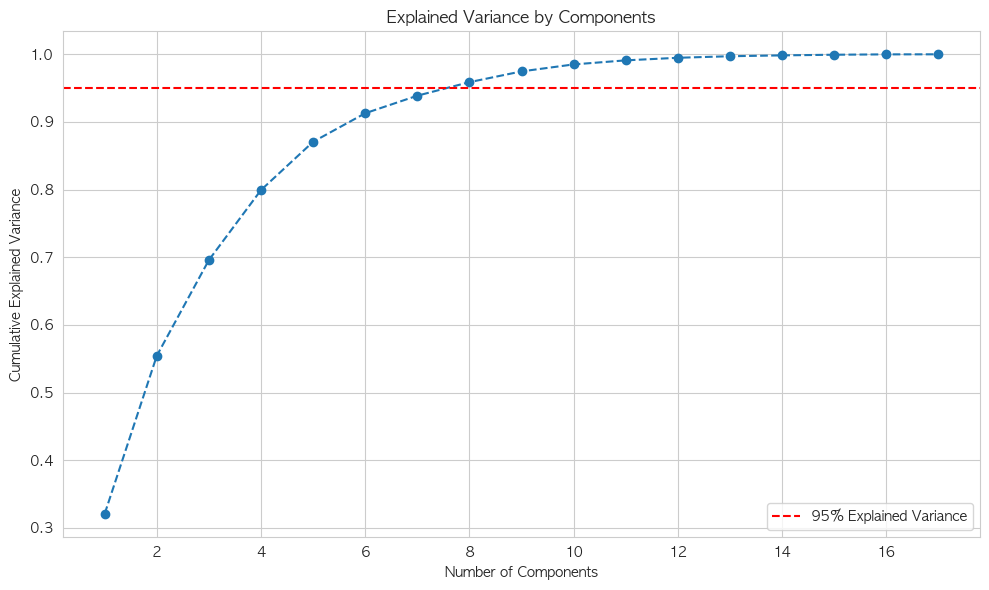

In [98]:
# 제공된 코드를 사용하여 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_minmax) + 1), explained_variance_minmax_df['Cumulative Explained Variance Ratio'], marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.legend(loc="lower right")
plt.tight_layout()

# 설명 분산과 누적 설명 분산 값 반환
explained_variance_ratio_minmax, explained_variance_minmax_df['Cumulative Explained Variance Ratio']


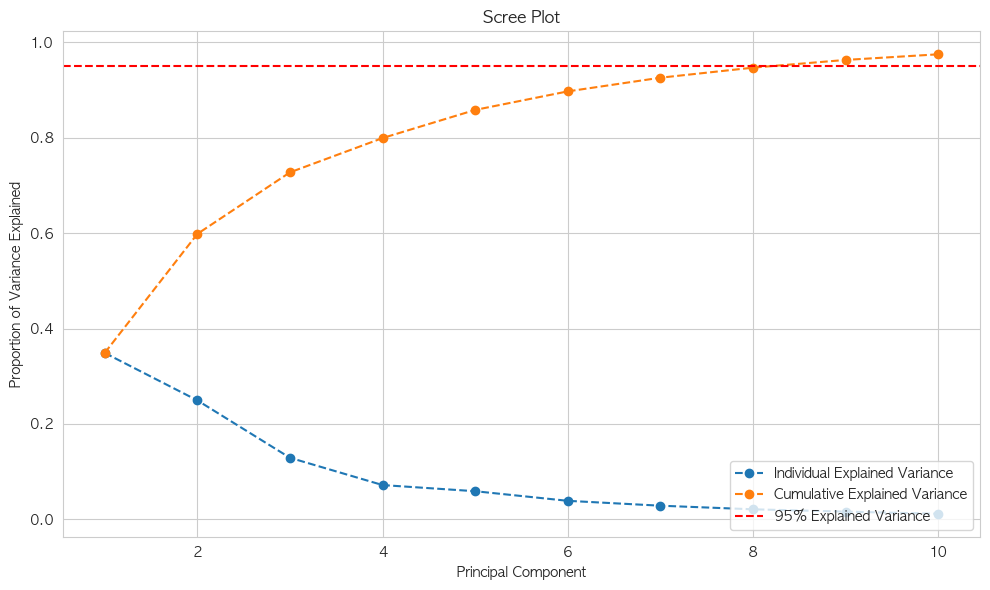

In [113]:
import matplotlib.pyplot as plt

# 주성분 분석의 결과에서 설명된 분산의 비율
explained_variance_ratio = [0.34880509, 0.24937039, 0.12907038, 0.07187701, 0.0589893, 0.03885531, 0.02864066, 0.02107843, 0.01619227, 0.01176716]

# 주성분 분석의 결과에서 누적 설명된 분산의 비율
cumulative_explained_variance = [0.34880509, 0.59817547, 0.72724586, 0.79912286, 0.85811216, 0.89696747, 0.92560813, 0.94668656, 0.96287883, 0.974646]

# Scree plot과 누적 설명 분산 그래프 생성
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Explained Variance")
plt.grid(True)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [114]:
# 3개의 주성분을 사용하여 PCA 실행
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(minmax_scaled_data)

# 각 주성분의 가중치 확인
component_weights = pd.DataFrame(pca_3.components_, columns=numeric_data.columns)
component_weights_transposed = component_weights.T

# 각 주성분의 가중치를 절댓값 기준으로 정렬
sorted_weights = []
for i in range(3):
    sorted_weights.append(component_weights_transposed[i].abs().sort_values(ascending=False))

# 가중치가 높은 변수들 확인
top_weights = pd.concat(sorted_weights, axis=1, keys=[f"Component {i+1}" for i in range(4)])
top_weights.head(10)  # 상위 10개 변수만 출력합니다. 필요하다면 수정 가능합니다.


,Component 1,Component 2,Component 3
다문화언어강사인원,0.359344,0.172467,0.250147
등록외국인,0.349929,0.223664,0.056715
2022_중점학교,0.321238,0.262202,0.308602
2022 년_종류별 주택수,0.307003,0.251580,0.032932
2023_초등학교수,0.306569,0.275915,0.004013
2022_특수학급,0.299957,0.275231,0.159547
2022_인구,0.263888,0.267280,0.005469
2021_다문화인구_소계,0.256153,0.315681,0.096329
심리지원센터,0.246467,0.007738,0.018877
어린이집개수,0.236890,0.347477,0.029116


/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haneul/an

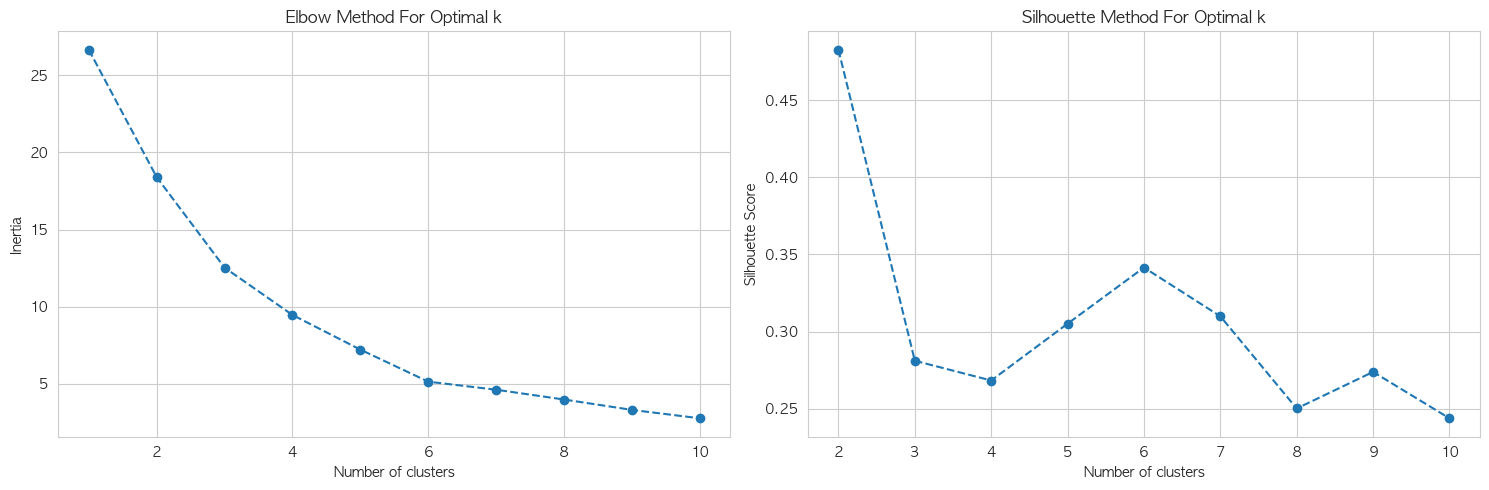

2

In [115]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3개의 주성분으로 PCA 진행한 데이터 사용
pca_3_result = pca_result_3

# Elbow Method
inertia = []
for i in range(1, 11):  # 1부터 10까지 클러스터 수를 변화시키며 KMeans 클러스터링 진행
    kmeans = KMeans(n_clusters=i, random_state=0).fit(pca_4_result)
    inertia.append(kmeans.inertia_)

# Silhouette Method
silhouette = []
for i in range(2, 11):  # 2부터 10까지 클러스터 수를 변화시키며 KMeans 클러스터링 진행
    kmeans = KMeans(n_clusters=i, random_state=0).fit(pca_4_result)
    silhouette.append(silhouette_score(pca_4_result, kmeans.labels_))

# 그래프 그리기
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method 그래프
ax[0].plot(range(1, 11), inertia, marker='o', linestyle='--')
ax[0].set_title('Elbow Method For Optimal k')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].grid(True)

# Silhouette Method 그래프
ax[1].plot(range(2, 11), silhouette, marker='o', linestyle='--')
ax[1].set_title('Silhouette Method For Optimal k')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# 최적의 클러스터 수 반환: Silhouette Score가 최대가 되는 지점
optimal_clusters_silhouette = silhouette.index(max(silhouette)) + 2  # +2는 클러스터 수가 2부터 시작하기 때문입니다.
optimal_clusters_silhouette


PCA + K-means

엘보우 메소드는 3,4 지지하고, 실루엣 점수는 2를 시사한다.(데이터셋이 두 개의 클러스터를 형성하는 것이 가장 명확하게 분리된다는 것을 의미한다. 3으로 결정

/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


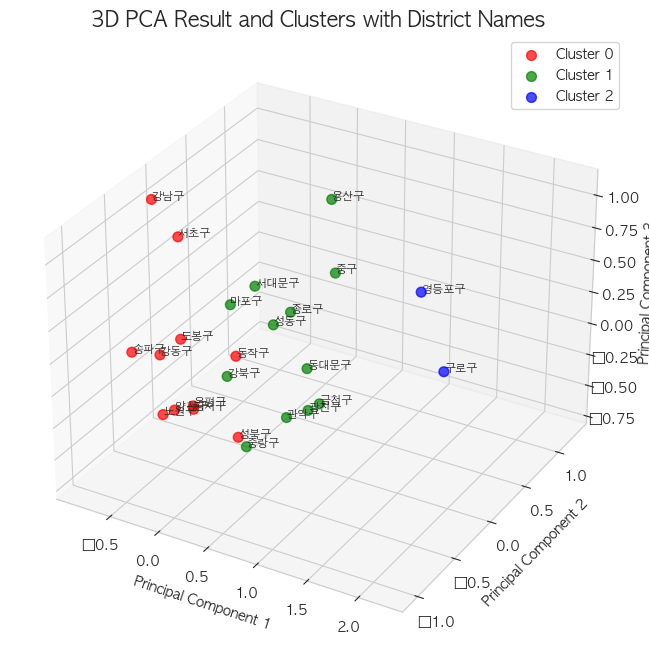

In [116]:
# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 별로 다른 색으로 점 표시
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(pca_df_3d.loc[pca_df_3d['Cluster'] == i, 'PC1'],
               pca_df_3d.loc[pca_df_3d['Cluster'] == i, 'PC2'],
               pca_df_3d.loc[pca_df_3d['Cluster'] == i, 'PC3'],
               color=colors[i], label=f'Cluster {i}', s=50, alpha=0.7)

# 각 점 위에 행정구 이름 표시
for i, txt in enumerate(data['행정구']):
    ax.text(pca_df_3d.loc[i, 'PC1'],
            pca_df_3d.loc[i, 'PC2'],
            pca_df_3d.loc[i, 'PC3'],
            txt, fontsize=8)

# 타이틀 및 레이블 설정
ax.set_title('3D PCA Result and Clusters with District Names', fontsize=15)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# 결과 출력
plt.show()


각 주성분이 어떤 방식으로 변수들의 선형 결합으로 이루어져 있는지 확인함으로써, <br>
각 주성분이 데이터의 어떤 특성을 잡아내고 있는지 이해할 수 있습니다.<br>
그리고 이를 바탕으로, 각 클러스터가 이러한 주성분들과 어떻게 관련되어 있는지 해석할 수 있습니다.<br>
각 클러스터가 PCA 주성분에 어떻게 영향을 주는지 이해하기 위해서는,<br>
각 클러스터의 중심점이 주성분 공간에서 어떻게 위치하는지, 그리고 클러스터 내의 데이터 포인트들이 주성분 공간에서 어떻게 분포하는지를 살펴보면 됩니다.<br>

In [117]:
# 클러스터 레이블을 PCA 결과 데이터프레임에 추가
pca_df_3d['Cluster'] = kmeans_3d.labels_

# 각 클러스터의 평균 주성분 점수 계산
cluster_mean_pca = pca_df_3d.groupby('Cluster').mean()
cluster_mean_pca.reset_index(inplace=True)

cluster_mean_pca


,Cluster,PC1,PC2,PC3
0,0,-0.414375,-0.521210,0.183743
1,1,0.000642,0.343412,-0.199625
2,2,1.860196,-0.058436,0.570535


## PCA 로딩값 알아보기


In [118]:
# PCA 객체 생성
pca_minmax = PCA()

# PCA 실행 및 결과 확인
pca_minmax_result = pca_minmax.fit_transform(minmax_scaled_data)
explained_variance_ratio_minmax = pca_minmax.explained_variance_ratio_

# 설명력 확인을 위한 데이터프레임 생성
explained_variance_minmax_df = pd.DataFrame({
    'Component': range(1, len(explained_variance_ratio_minmax) + 1),
    'Explained Variance Ratio': explained_variance_ratio_minmax,
    'Cumulative Explained Variance Ratio': explained_variance_ratio_minmax.cumsum()
})

explained_variance_minmax_df.head(10)

,Component,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,1,0.320930,0.320930
1,2,0.233566,0.554497
2,3,0.141451,0.695948
3,4,0.103433,0.799381
4,5,0.071312,0.870692
5,6,0.042183,0.912876
6,7,0.025933,0.938808
7,8,0.020022,0.958830
8,9,0.015907,0.974738
9,10,0.010313,0.985051


- pca 결과를 바탕으로 설명된 분산의 비율과 누적 설명된 분산의 비율 확인 가능하다.
- 3개의 주성분으로 약 71.9% 분산 설명 가능

In [119]:
# PCA 로딩 값 데이터프레임 생성 (첫 3개 주성분에 대해)
pca_loadings_minmax = pd.DataFrame(pca_minmax.components_[:3].T, index=numeric_data.columns, columns=[f'PC{i}' for i in range(1, 4)])
pca_loadings_minmax


,PC1,PC2,PC3
2022_다문화가구원_소계,-0.075920,0.364510,0.064606
2021_다문화인구_소계,-0.256153,0.315681,0.096329
2022_인구,0.263888,0.267280,0.005469
2023_초등학교수,0.306569,0.275915,0.004013
2022 년_종류별 주택수,0.307003,0.251580,0.032932
등록외국인,-0.349929,0.223664,0.056715
어린이집개수,0.236890,0.347477,-0.029116
도서관개수,0.193632,0.144202,0.152463
다문화언어강사인원,-0.359344,0.172467,-0.250147
어린이복지센터개수,0.108899,0.310010,-0.407572


## 계층적 군집화

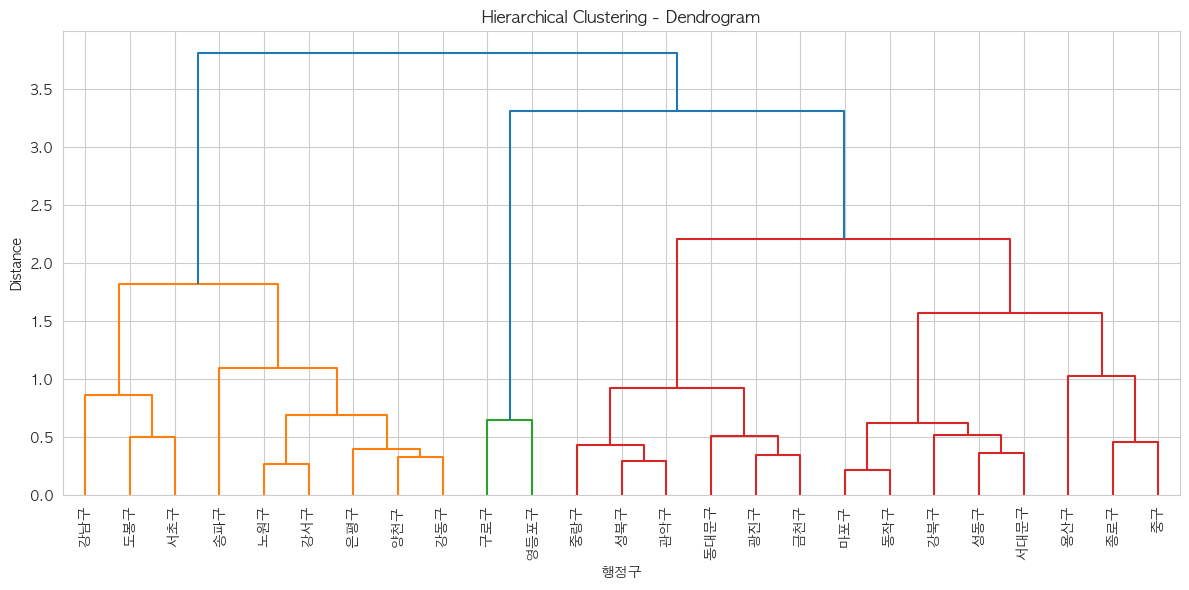

In [120]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# PCA 결과에서 첫 3개의 주성분 선택
pca_result_3d = pca_minmax_result[:, :3]

# 계층적 군집화 진행
linkage_matrix = linkage(pca_result_3d, method='ward')

# 덴드로그램 시각화
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=data['행정구'].tolist(), leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering - Dendrogram')
plt.xlabel('행정구')
plt.ylabel('Distance')
plt.axhline(y=15, color='r', linestyle='--')  # 적절한 거리에 빨간 선 그리기 (클러스터 수를 정하기 위한 참고선)
plt.tight_layout()
plt.show()


In [121]:
from sklearn.cluster import AgglomerativeClustering

# 3개의 클러스터로 계층적 군집화 진행
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_labels = agg_clustering.fit_predict(pca_result_3d)

# 클러스터 레이블 추가
data['Cluster_Labels'] = cluster_labels

# 클러스터 결과 확인
# 모든 변수를 고려한 클러스터 평균 확인
cluster_summary_all = data.groupby('Cluster_Labels').mean().reset_index()
cluster_summary_all_transposed = cluster_summary_all.transpose()
cluster_summary_all_transposed.columns = cluster_summary_all_transposed.iloc[0]
cluster_summary_all_transposed = cluster_summary_all_transposed.drop(cluster_summary_all_transposed.index[0])
cluster_summary_all_transposed



/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_68366/979274178.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary_all = data.groupby('Cluster_Labels').mean().reset_index()


Cluster_Labels,0.0,1.0,2.0
2022_다문화초등학생수_계,455.428571,425.555556,1286.500
2022_다문화가구원_소계,6471.000000,7373.222222,16752.500
2021_다문화인구_소계,17003.428571,9473.666667,51716.000
2022_인구,319200.571429,486928.666667,408251.500
2023_초등학교수,19.357143,31.777778,25.000
2022 년_종류별 주택수,97985.642857,165561.444444,124735.500
등록외국인,11302.928571,4242.000000,22592.500
어린이집개수,147.214286,241.222222,245.000
도서관개수,6.642857,10.000000,9.000
다문화언어강사인원,3.285714,0.888889,6.000


각 클러스터의 평균값을 바탕으로 변수별로 클러스터를 분석해보겠습니다. (수치는 클러스터 내 평균값입니다)
``
- **클러스터 0**
- 다문화 초등학생 수: 455명
- 중학교 수: 152개
- 고등학교 수: 78개
- 다문화 인구 합계: 17,003명
- 인구 밀도: 16,985명/㎢
- 초등학교 수: 19개
- 종류별 주택 수: 97,986개
- 등록 외국인: 11,303명
- 중국 외 외국인 체류 인구 수: 375명
- 어린이집 개수: 147개
- 도서관 개수: 7개
- 다문화 언어 강사 인원: 3명
- 어린이 복지 센터 개수: 16개
- 2020 수준 지수: 157.41
- 중점 학교: 0.71개
- 특수 학급: 1.07개
- 다문화 출생 신고 수: 80명
- 다문화 수용성 점수: 6.68
- 강사 수: 1.71명
``
---
``
- **클러스터 1**
- 다문화 초등학생 수: 1,287명
- 중학교 수: 468개
- 고등학교 수: 181개
- 다문화 인구 합계: 51,716명
- 인구 밀도: 18,505명/㎢
- 초등학교 수: 25개
- 종류별 주택 수: 124,736개
- 등록 외국인: 22,593명
- 중국 외 외국인 체류 인구 수: 177명
- 어린이집 개수: 245개
- 도서관 개수: 9개
- 다문화 언어 강사 인원: 6명
- 어린이 복지 센터 개수: 21개
- 2020 수준 지수: 144.65
- 중점 학교: 5개
- 특수 학급: 5.5개
- 다문화 출생 신고 수: 101명
- 다문화 수용성 점수: 8.10
- 강사 수: 1.5명
``
---
``
- **클러스터 2**
- 다문화 초등학생 수: 426명
- 중학교 수: 147개
- 고등학교 수: 81개
- 다문화 인구 합계: 9,474명
- 인구 밀도: 16,162명/㎢
- 초등학교 수: 32개
- 종류별 주택 수: 165,561개
- 등록 외국인: 4,242명
- 중국 외 외국인 체류 인구 수: 202명
- 어린이집 개수: 241개
- 도서관 개수: 10개
- 다문화 언어 강사 인원: 0.89명
- 어린이 복지 센터 개수: 18개
- 2020 수준 지수: 92.52
- 중점 학교: 0개
- 특수 학급: 0.11개
- 다문화 출생 신고 수: 113명
- 다문화 수용성 점수: 7.47
- 강사 수: 0.67명
``
---
이러한 데이터를 바탕으로, 각 클러스터가 어떠한 특성을 가지고 있는지 해석할 수 있습니다. 예를 들어, 클러스터 1은 다문화 인구, 다문화 초등학생 수, 등록 외국인 등이 가장 많아 다문화 관련 인프라를 필요로 하는 지역일 가능성이 있습니다. 반면, 클러스터 2는 상대적으로 이러한 값들이 낮아 보입니다.

추가로 각 변수의 분포와 특성에 따라 다른 분석 방법론이나 다른 변수를 선택하여 분석을 진행할 수도 있습니다.

/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


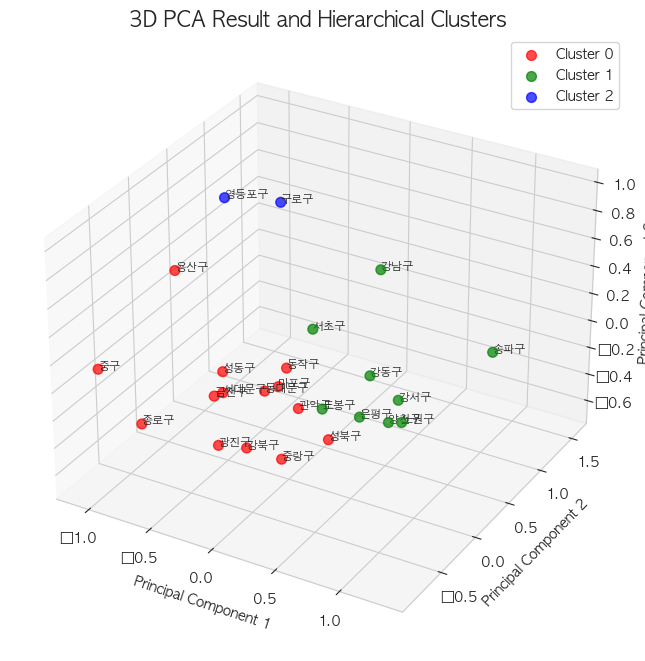

In [122]:
from mpl_toolkits.mplot3d import Axes3D

# 3개의 주성분으로 PCA 변환
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(minmax_scaled_data)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 별로 다른 색으로 점 표시
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(pca_result_3d[agg_clustering.labels_ == i, 0],
               pca_result_3d[agg_clustering.labels_ == i, 1],
               pca_result_3d[agg_clustering.labels_ == i, 2],
               color=colors[i], label=f'Cluster {i}', s=50, alpha=0.7)

# 행정구 이름 표시
for i, txt in enumerate(data['행정구']):
    ax.text(pca_result_3d[i, 0], pca_result_3d[i, 1], pca_result_3d[i, 2], txt, fontsize=8)

# 타이틀 및 레이블 설정
ax.set_title('3D PCA Result and Hierarchical Clusters', fontsize=15)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# 결과 출력
plt.show()


## 가우시안혼합모델

/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


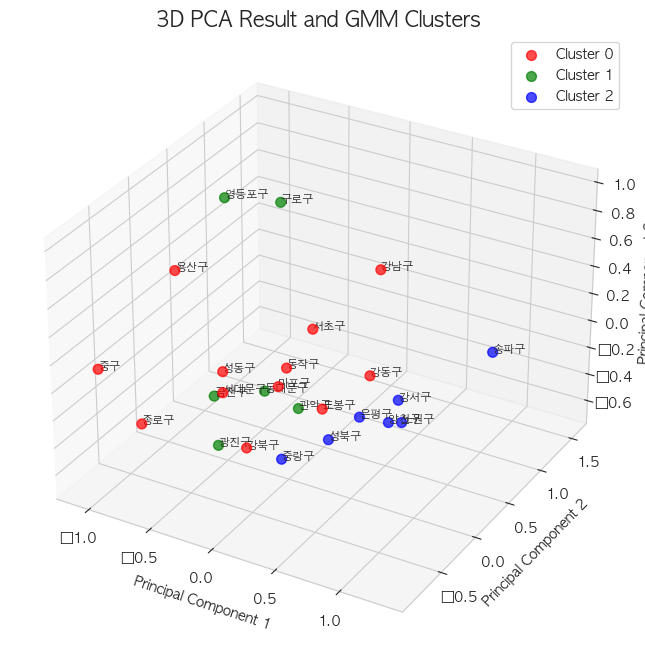

In [123]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture Model 객체 생성 및 학습
gmm = GaussianMixture(n_components=3, random_state=0).fit(pca_result_3d)

# 클러스터 레이블 할당
gmm_labels = gmm.predict(pca_result_3d)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 별로 다른 색으로 점 표시
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(pca_result_3d[gmm_labels == i, 0],
               pca_result_3d[gmm_labels == i, 1],
               pca_result_3d[gmm_labels == i, 2],
               color=colors[i], label=f'Cluster {i}', s=50, alpha=0.7)

# 행정구 이름 표시
for i, txt in enumerate(data['행정구']):
    ax.text(pca_result_3d[i, 0], pca_result_3d[i, 1], pca_result_3d[i, 2], txt, fontsize=8)

# 타이틀 및 레이블 설정
ax.set_title('3D PCA Result and GMM Clusters', fontsize=15)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# 결과 출력
plt.show()


## SpectralClustering

/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


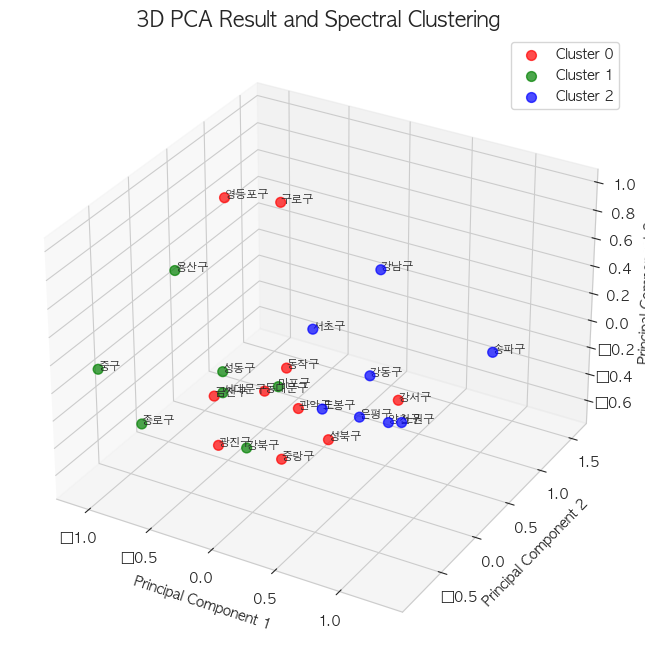

In [124]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering 객체 생성 및 학습
spectral_clustering = SpectralClustering(n_clusters=3, random_state=0, affinity='nearest_neighbors').fit(pca_result_3d)

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 별로 다른 색으로 점 표시
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(pca_result_3d[spectral_clustering.labels_ == i, 0],
               pca_result_3d[spectral_clustering.labels_ == i, 1],
               pca_result_3d[spectral_clustering.labels_ == i, 2],
               color=colors[i], label=f'Cluster {i}', s=50, alpha=0.7)

# 행정구 이름 표시
for i, txt in enumerate(data['행정구']):
    ax.text(pca_result_3d[i, 0], pca_result_3d[i, 1], pca_result_3d[i, 2], txt, fontsize=8)

# 타이틀 및 레이블 설정
ax.set_title('3D PCA Result and Spectral Clustering', fontsize=15)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# 결과 출력
plt.show()


- 스펙트럴 클러스터링은 주어진 데이터를 고차원 공간에 매핑한 후, k-평균 클러스터링을 이용하여 데이터를 그룹화합니다. 이 방법은 특히 데이터가 비선형 구조를 가지고 있을 때 유용하다.
- 결과가 흥미롭다. 

In [125]:
# 원본 데이터에 클러스터링 결과를 추가합니다.
data_with_cluster = data.copy()
data_with_cluster['Spectral_Cluster'] = spectral_clustering.labels_

# 각 클러스터의 특성을 이해하기 위해, 각 클러스터 내의 변수들의 평균값을 계산합니다.
cluster_mean_values = data_with_cluster.groupby('Spectral_Cluster').mean().iloc[:, 1:]

# 원본 데이터의 평균값을 추가하여 비교를 용이하게 합니다.
overall_mean = pd.DataFrame(data_with_cluster.mean(), columns=['Overall']).T.iloc[:, 1:]
cluster_comparison = pd.concat([overall_mean, cluster_mean_values])

# 결과를 출력합니다.
cluster_comparison.T.sort_values(by='Overall', ascending=False)


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_68366/652041705.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_mean_values = data_with_cluster.groupby('Spectral_Cluster').mean().iloc[:, 1:]
/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_68366/652041705.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  overall_mean = pd.DataFrame(data_with_cluster.mean(), columns=['Overall']).T.iloc[:, 1:]


,Overall,0,1,2
2022_인구,386706.7600,406259.400,256765.000000,475965.00000
2022 년_종류별 주택수,124452.9200,123423.300,84092.571429,161055.25000
2021_다문화인구_소계,17069.7200,26044.700,13390.571429,9070.25000
등록외국인,9664.1600,13687.200,10282.571429,4094.25000
2022_다문화가구원_소계,7618.3200,9873.600,5117.571429,6987.37500
어린이집개수,188.8800,202.500,119.714286,232.37500
2020_수준지수,133.0276,70.475,264.430000,96.24125
2022_다문화출생신고수,93.2000,88.800,79.142857,111.00000
2023_초등학교수,24.2800,24.100,16.428571,31.37500
어린이복지센터개수,17.0400,21.300,10.000000,17.87500


/Users/haneul/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_68366/653726489.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  voting_labels = np.array([mode(all_labels[i])[0][0] for i in range(all_labels.shape[0])])
/Users/haneul/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.pr

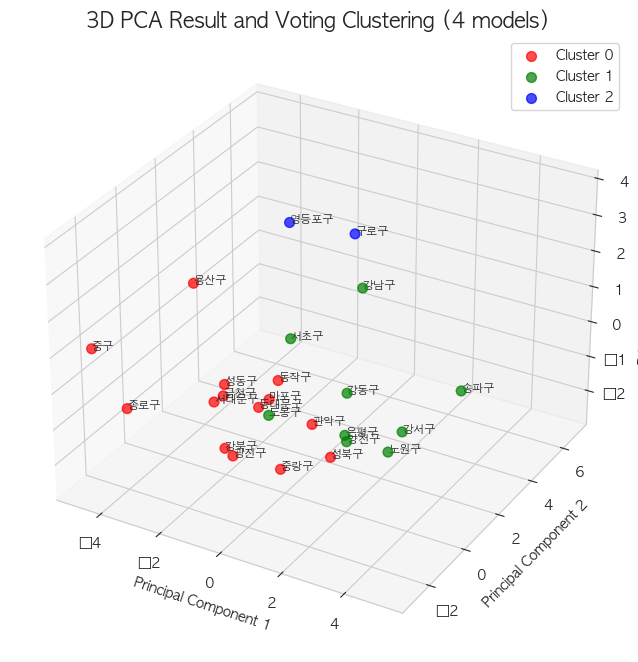

In [133]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import mode

# PCA 결과
pca_result_3d = pca_3d.fit_transform(std_scaled_data)

# K-Means 클러스터링
kmeans_3d = KMeans(n_clusters=3, random_state=0).fit(pca_result_3d)

# Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=3, random_state=0, affinity='nearest_neighbors').fit(pca_result_3d)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0).fit(pca_result_3d)
gmm_labels = gmm.predict(pca_result_3d)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3).fit(pca_result_3d)

# 각 모델의 레이블 추출
kmeans_labels = kmeans_3d.labels_
spectral_labels = spectral_clustering.labels_
agglomerative_labels = agglomerative.labels_

# 모든 레이블을 쌓고, 가장 많이 등장하는 레이블을 최종 레이블로 선정
all_labels = np.vstack((kmeans_labels, spectral_labels, gmm_labels, agglomerative_labels)).T
voting_labels = np.array([mode(all_labels[i])[0][0] for i in range(all_labels.shape[0])])

# 3D 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 클러스터 별로 다른 색으로 점 표시
colors = ['r', 'g', 'b']
for i in range(3):
    ax.scatter(pca_result_3d[voting_labels == i, 0],
               pca_result_3d[voting_labels == i, 1],
               pca_result_3d[voting_labels == i, 2],
               color=colors[i], label=f'Cluster {i}', s=50, alpha=0.7)

# 행정구 이름 표시
for i, txt in enumerate(data['행정구']):
    ax.text(pca_result_3d[i, 0], pca_result_3d[i, 1], pca_result_3d[i, 2], txt, fontsize=8)

# 타이틀 및 레이블 설정
ax.set_title('3D PCA Result and Voting Clustering (4 models)', fontsize=15)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

# 결과 출력
plt.show()